RESTAURANT COST PREDICTION

Here we have a restaurant cost  dataset and with that, visualize and predict. let's start with exploratory in data and then predict.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import date
from datetime import datetime

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor, Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

sns.set_style(style=("darkgrid"))
plt.figure(figsize=(10, 8))

import warnings
warnings.filterwarnings('ignore')

<Figure size 1000x800 with 0 Axes>

In [2]:
data_test=pd.read_excel('C:/Users/user/Downloads/Restaurant_food_cost/Participants_Data_Final/Data_Test.xlsx')
data_train=pd.read_excel('C:/Users/user/Downloads/Restaurant_food_cost/Participants_Data_Final/Data_Train.xlsx')

In [3]:
data_train.info()

print("+++++++++++++++++++++++++++++++++++++++")

data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB
+++++++++++++++++++++++++++++++++++++++
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   T

In [4]:
#no.of null values
print("For Train Dataset\n")
print(data_train.isnull().sum())
print("******************************************")
print("For Test Dataset\n")
print(data_test.isnull().sum())

For Train Dataset

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64
******************************************
For Test Dataset

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64


In [5]:
#no.of duplicated  rows
print("No.of duplicated rows in Train dataset ", data_train.duplicated().sum())
print("\n*******************************************\n")
print("No. of duplicated rws in Test dataset ", data_test.duplicated().sum())

No.of duplicated rows in Train dataset  25

*******************************************

No. of duplicated rws in Test dataset  1


In [6]:
#no.of unique values in a  column
print("For Train Dataset\n")
print(data_train.nunique())
print("\n**************************\n")
print("For Test Dataset\n")
print(data_test.nunique())

For Train Dataset

TITLE              113
RESTAURANT_ID    11892
CUISINES          4155
TIME              2689
CITY               359
LOCALITY          1416
RATING              32
VOTES             1847
COST                86
dtype: int64

**************************

For Test Dataset

TITLE              86
RESTAURANT_ID    4127
CUISINES         1727
TIME             1183
CITY              151
LOCALITY          834
RATING             31
VOTES            1136
dtype: int64


In [7]:
print("For Train data \n")
print(data_train.columns)
print("\n No. of Columns : ", len(data_train.columns))

print("\n****************************************************\n")

print("For Test data \n")
print(data_test.columns)
print("\n No. of columns : ", len(data_test.columns))

For Train data 

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

 No. of Columns :  9

****************************************************

For Test data 

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

 No. of columns :  8


In [8]:
#Numeric values
print("For Train data \n")
numeric_columns = list(data_train.select_dtypes(exclude=['object','datetime']).columns)
print(numeric_columns)
print("\n No. of Numeric Columns : ", len(numeric_columns))

print("\n****************************************\n")

print("For Test data \n")
numeric_columns=list(data_test.select_dtypes(exclude=['object', 'datetime']).columns)
print(numeric_columns)
print("\n No. of Numeric Columns : ", len(numeric_columns))

For Train data 

['RESTAURANT_ID', 'COST']

 No. of Numeric Columns :  2

****************************************

For Test data 

['RESTAURANT_ID']

 No. of Numeric Columns :  1


In [9]:
# Categorical values

print("For Train data \n")
categorical_columns = list(data_train.select_dtypes(include=['object']).columns)
print(categorical_columns)
print("No. of Categorical Columns : ", len(categorical_columns))

print("\n*************************************************\n")

print("For Test data \n")
categorical_columns = list(data_test.select_dtypes(include=['object']).columns)
print(categorical_columns)
print("No. of Categorical Columns : ",len(categorical_columns))

For Train data 

['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES']
No. of Categorical Columns :  7

*************************************************

For Test data 

['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES']
No. of Categorical Columns :  7


EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

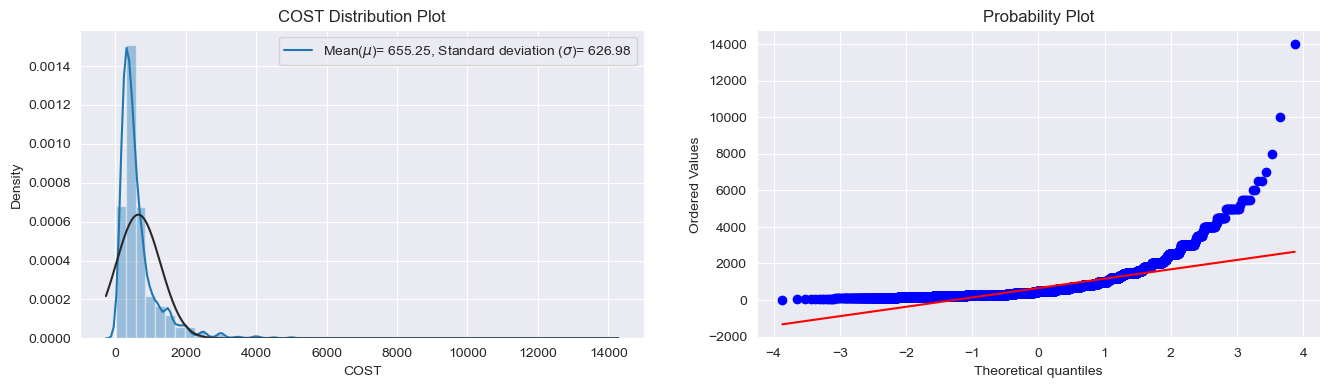

In [10]:
#UNIVARIATE ANALYSIS
#TARGET VARIABLE
#How is the 'Revenue' (Target variable) distributed?
from scipy.stats import norm
from statistics import mean
from scipy import stats
f,(fig1,fig2)=plt.subplots(1,2,figsize=(16,4))
mean,sd=norm.fit(data_train.COST)
fig1=sns.distplot(data_train.COST,ax=fig1,fit=norm)
fig1.set_xlabel("COST")
fig1.set_title("COST Distribution Plot")
fig1.legend([f'Mean($\mu$)= {mean:.2f}, Standard deviation ($\sigma$)= {sd:.2f}'],loc='best')
fig2=stats.probplot(data_train.COST,plot=fig2)
f.show()

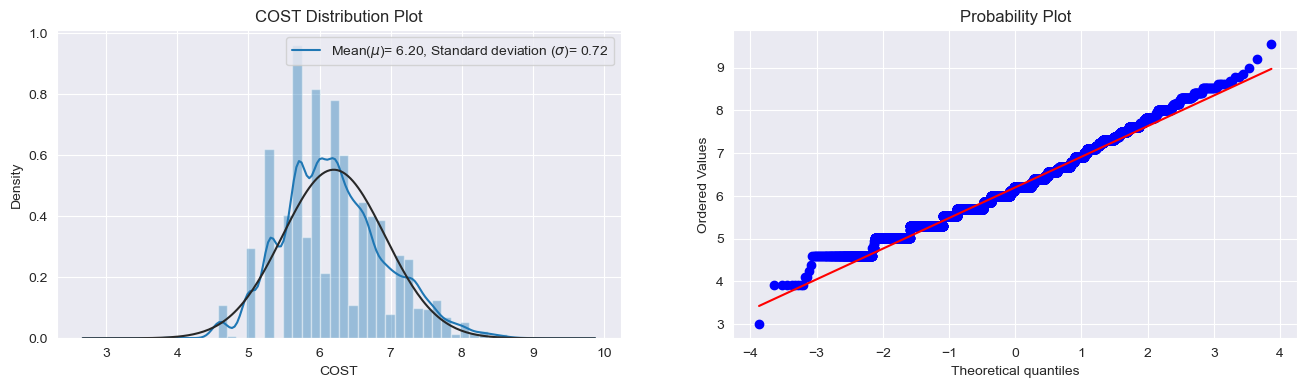

In [11]:
f,(fig1,fig2)=plt.subplots(1,2,figsize=(16,4))
mean,sd=norm.fit(np.log(data_train.COST))
fig1=sns.distplot(np.log(data_train.COST),ax=fig1,fit=norm)
fig1.set_xlabel("COST")
fig1.set_title("COST Distribution Plot")
fig1.legend([f'Mean($\mu$)= {mean:.2f}, Standard deviation ($\sigma$)= {sd:.2f}'],loc='best')
fig2=stats.probplot(np.log(data_train.COST),plot=fig2)
f.show()

Categorical Features

what is the no. of restaurants belonging to each 'Type'?


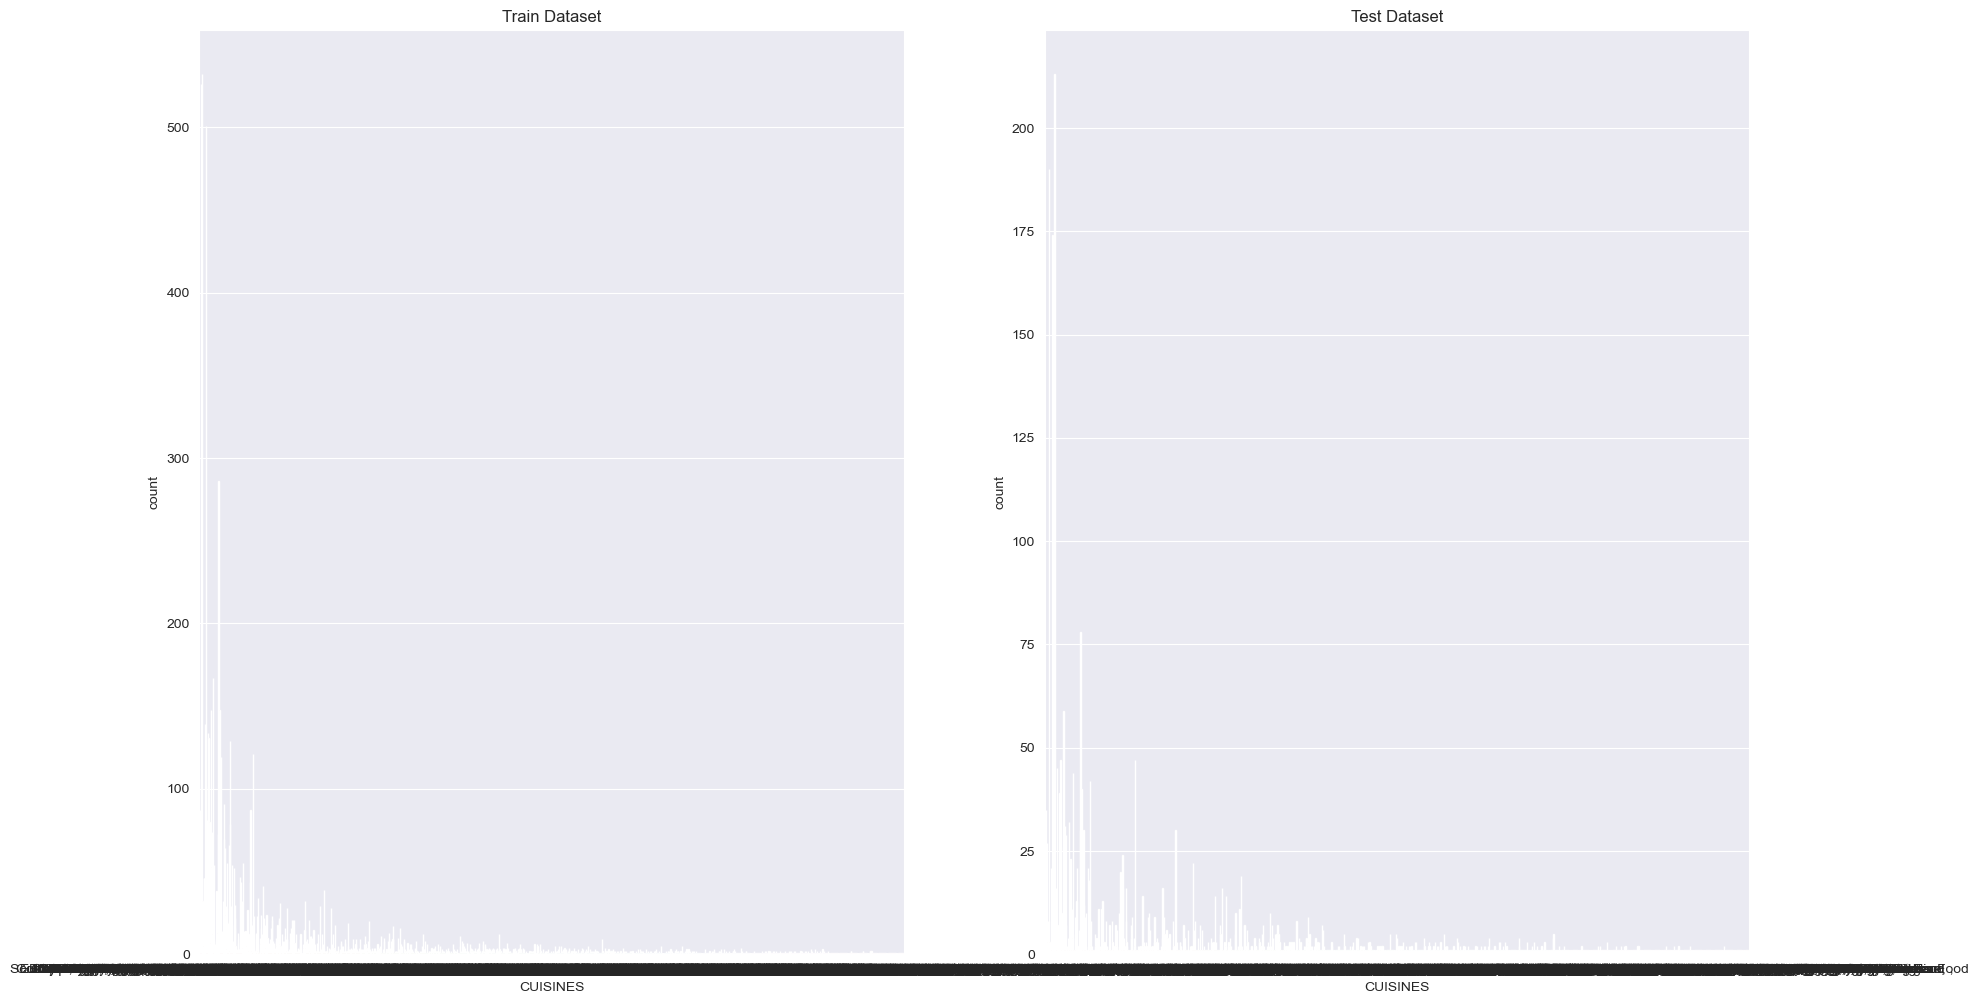

In [12]:
f,(fig1,fig2)=plt.subplots(1,2,figsize=(20,12))
fig1=sns.countplot(data_train.CUISINES,ax=fig1)
fig1.set_title("Train Dataset")
fig2=sns.countplot(data_test.CUISINES,ax=fig2)
fig2.set_title("Test Dataset")
f.show()

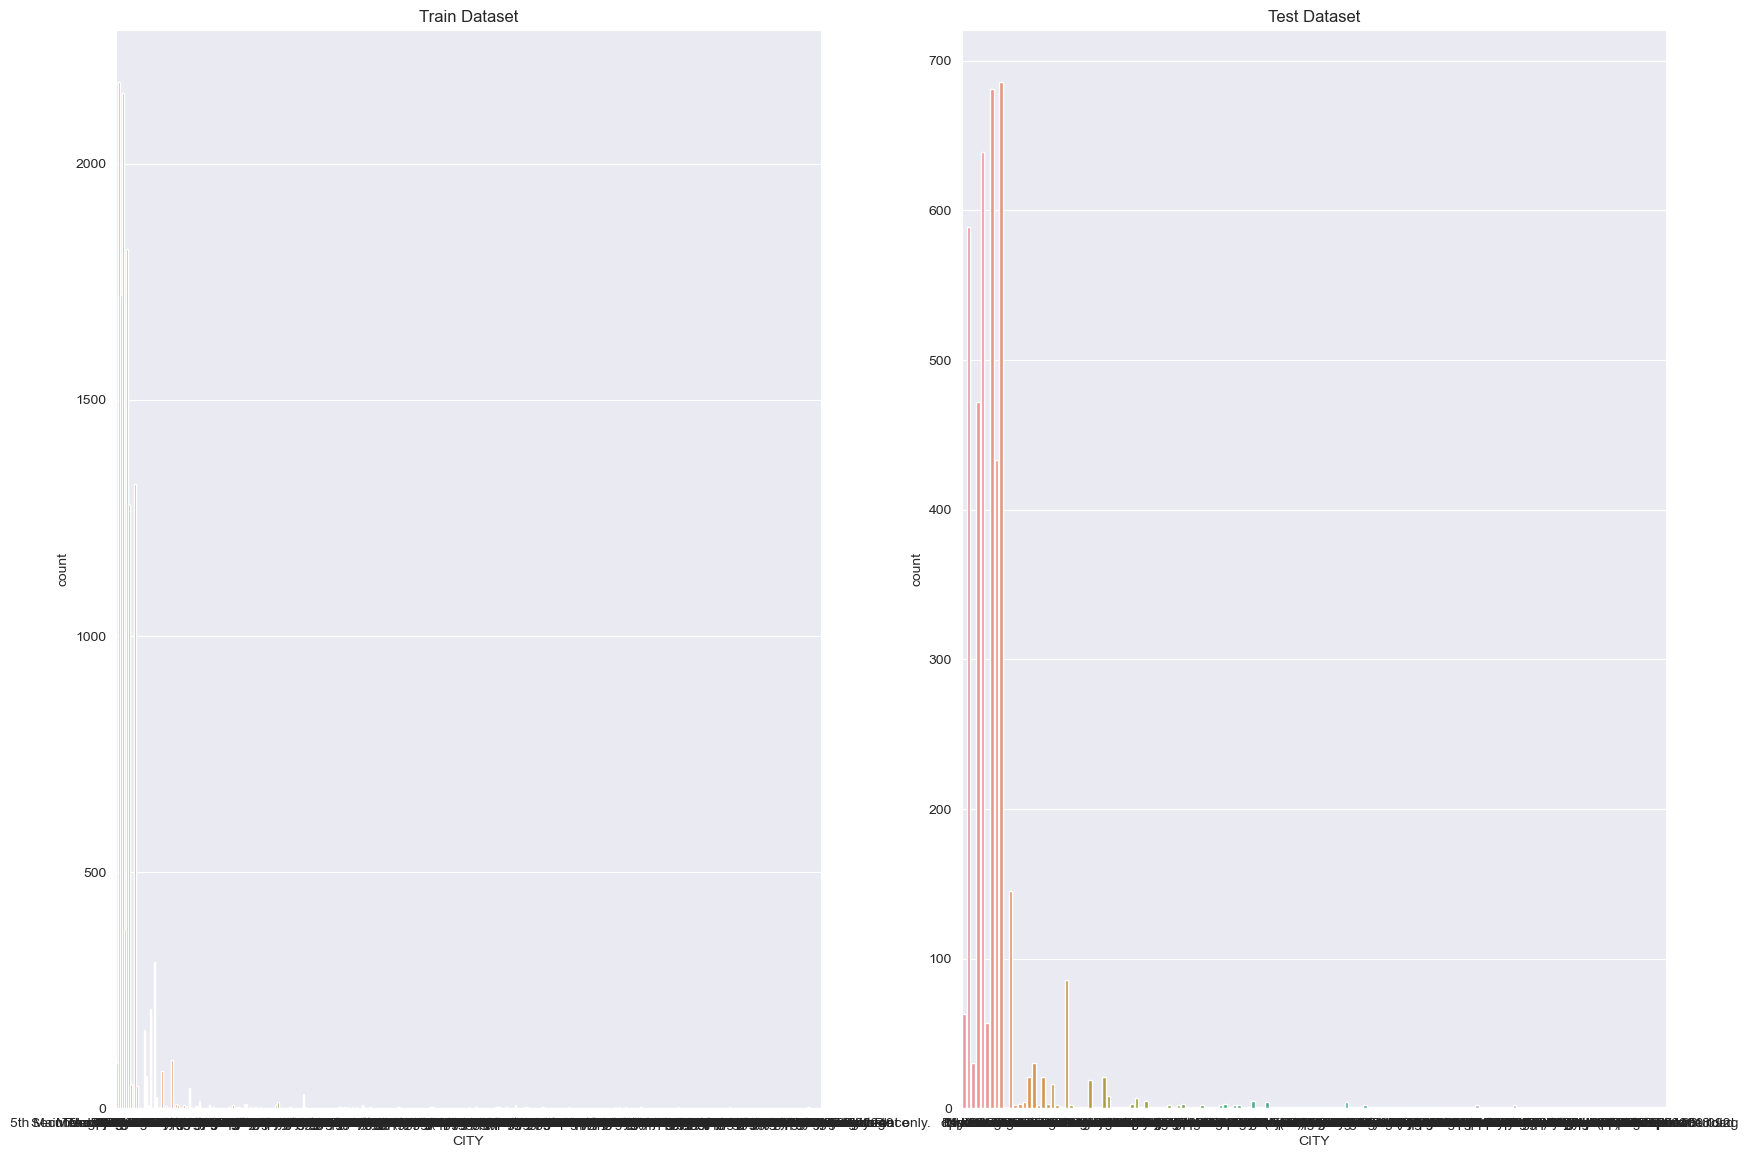

In [13]:
# what is the no.of restaurants belonging to different 'CITY TYPES'?
f,(fig1,fig2)=plt.subplots(1,2,figsize=(20,14))
fig1=sns.countplot(data_train['CITY'],ax=fig1)
fig1.set_title("Train Dataset")
fig2=sns.countplot(data_test['CITY'],ax=fig2)
fig2.set_title("Test Dataset")
f.show()

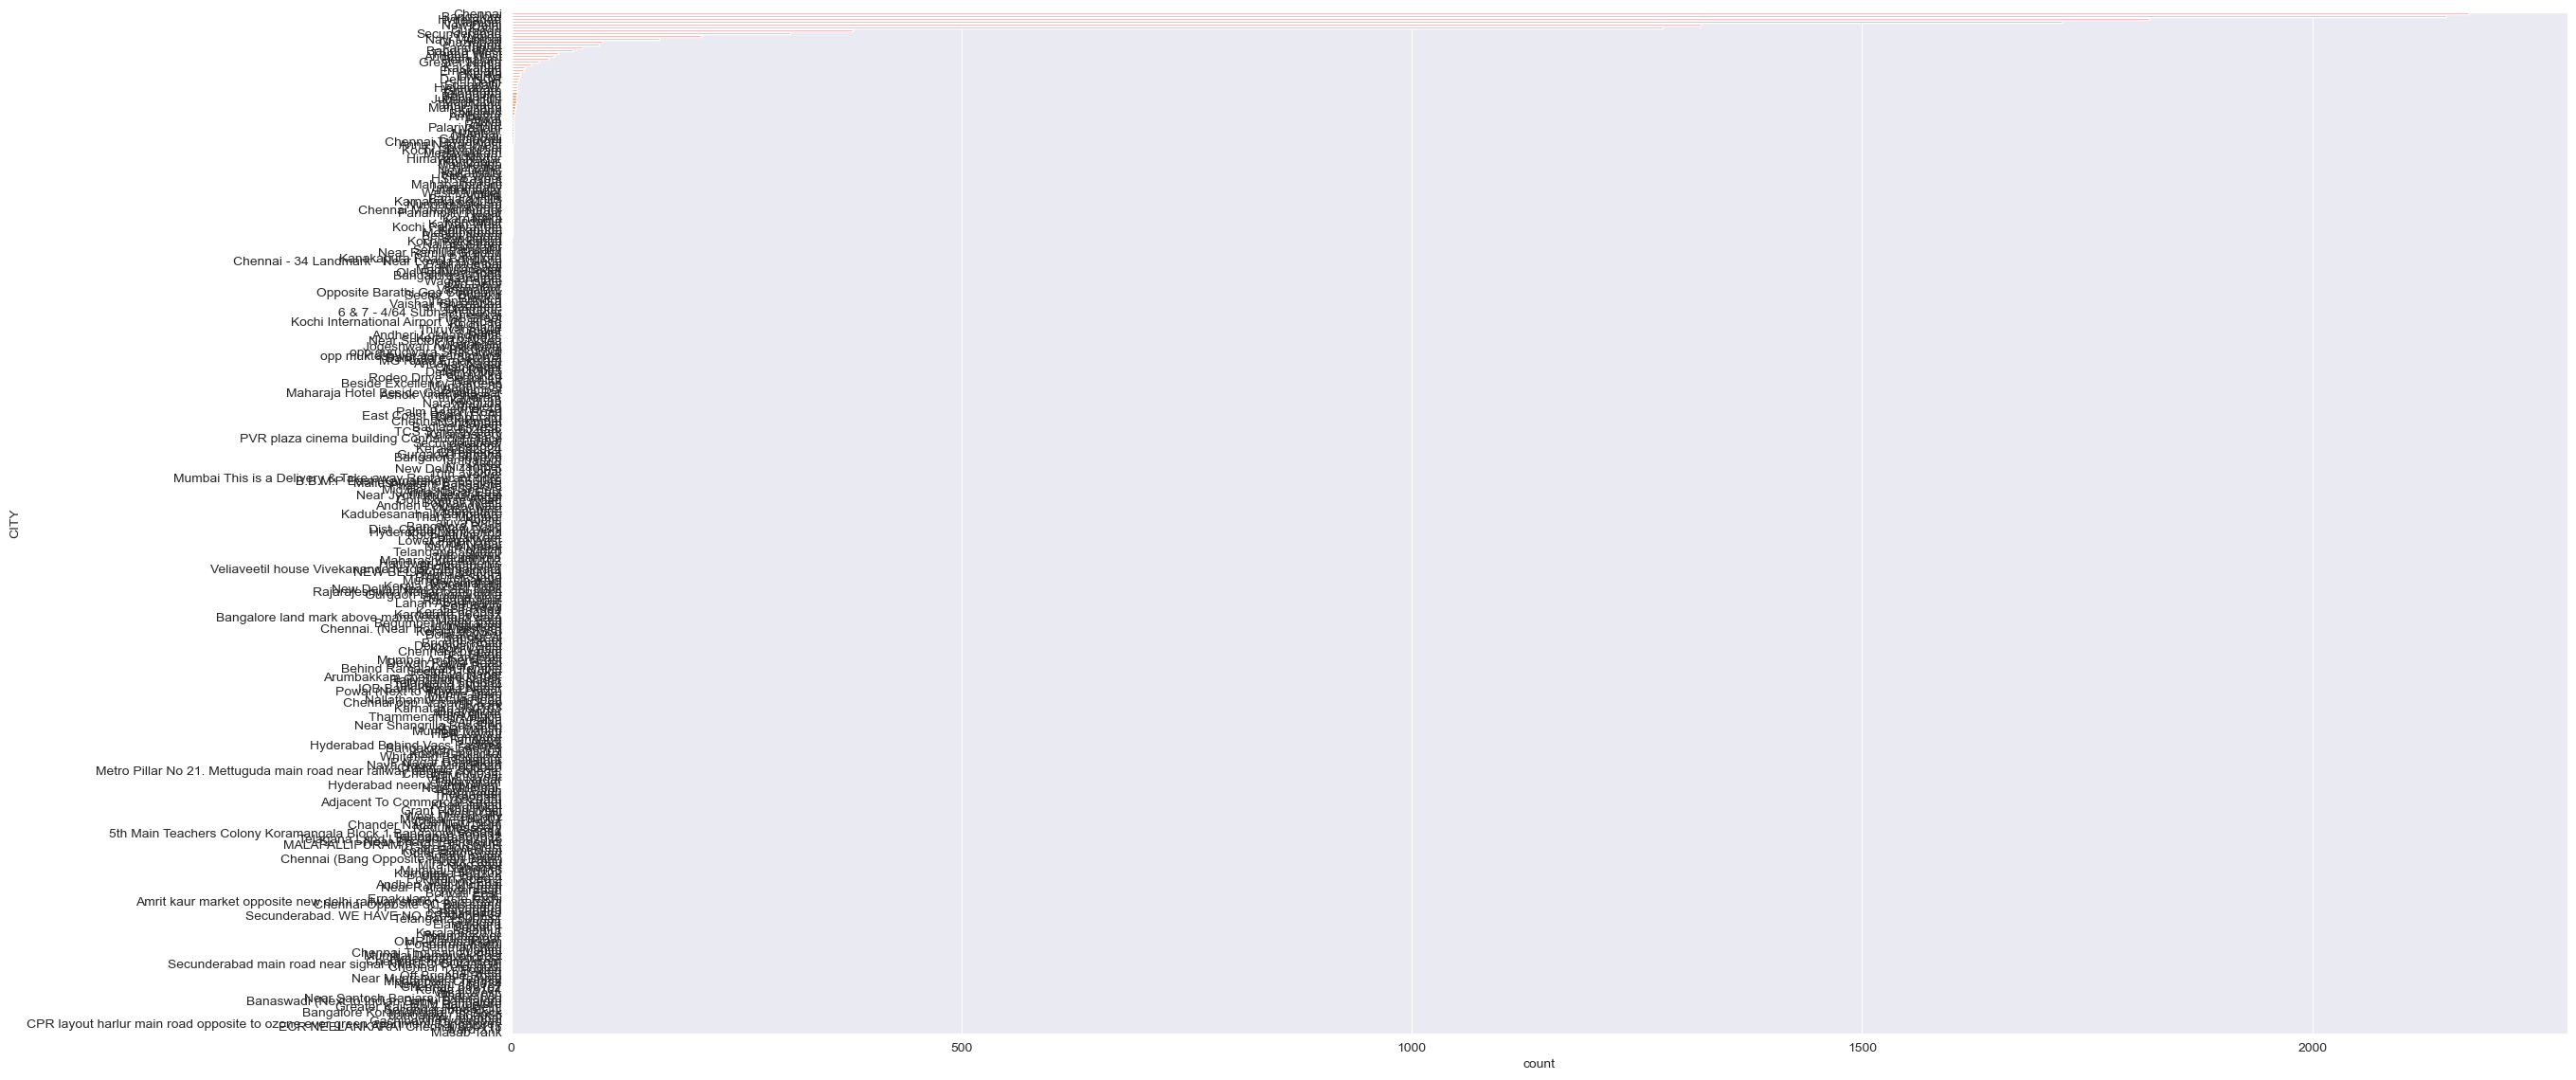

In [14]:
#What is the no. of restaurants located in each 'City' ?
#Let's check the no. of restuarants in each city in the Training dataset.
plt.figure(figsize=(28,14))
sns.countplot(data=data_train,y='CITY',order=data_train.CITY.value_counts(ascending=False).index)
plt.show()

Let's check the cities with major number of restaurants.

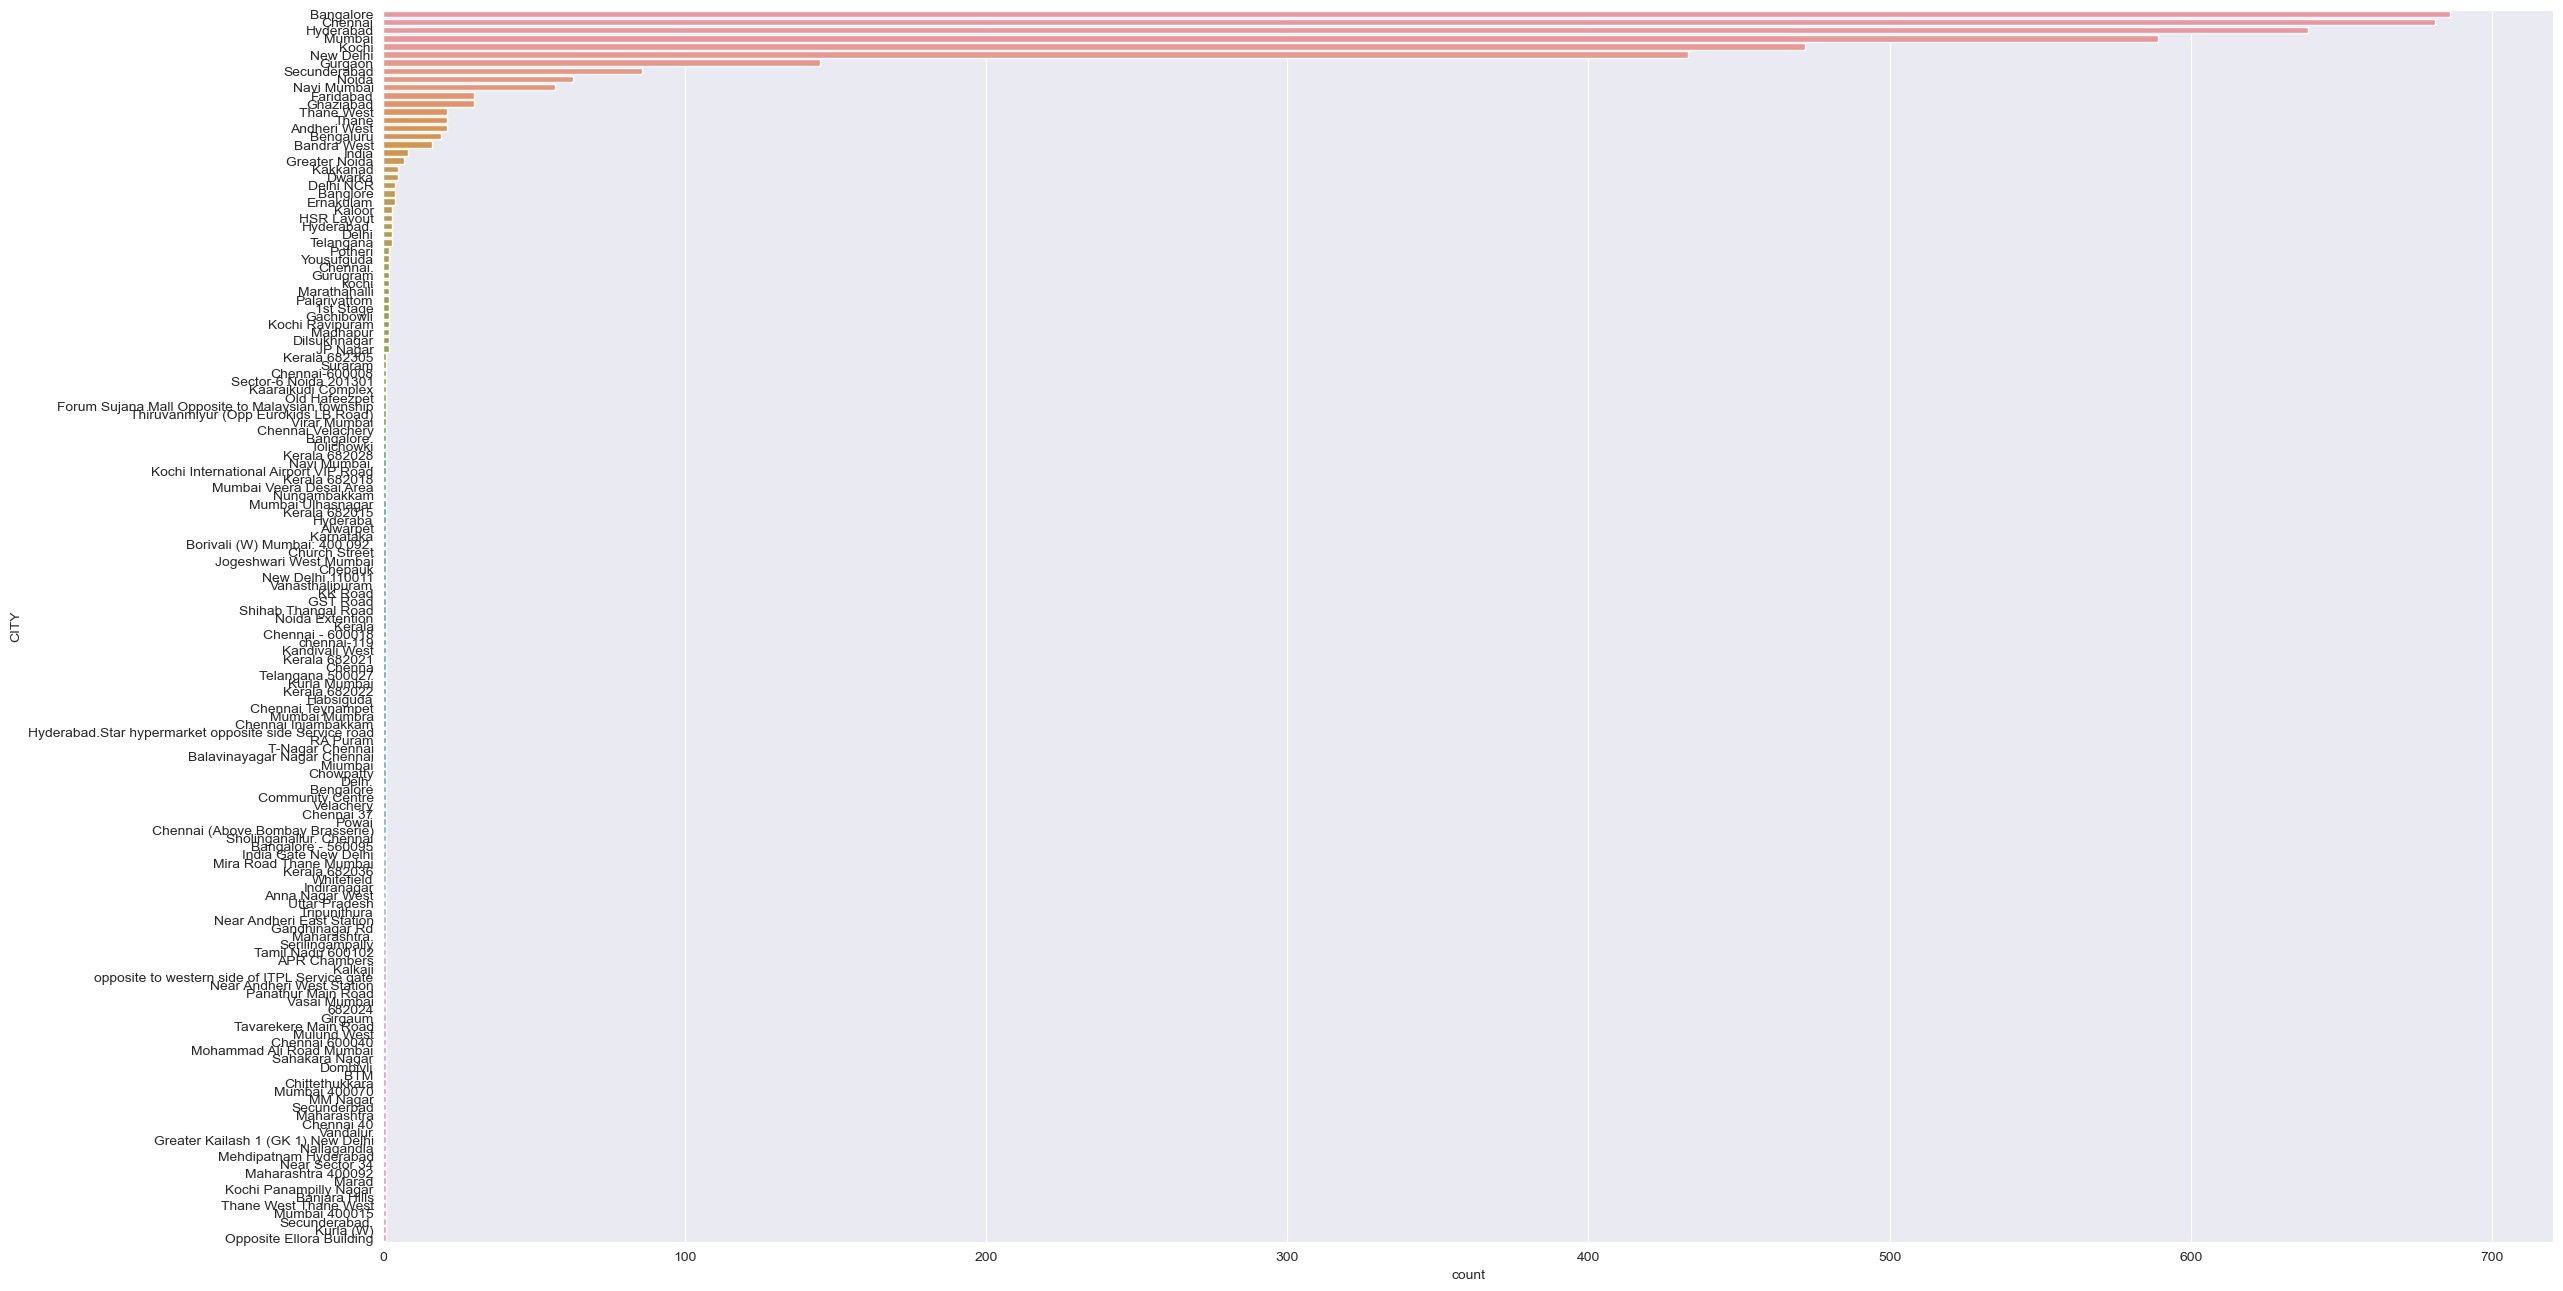

In [15]:
plt.figure(figsize=(28,16))
sns.countplot(data=data_test,y='CITY',order=data_test.CITY.value_counts(ascending=False).index)
plt.show()

In [16]:
counts = data_test['CITY'].value_counts() 
percent = ((data_test['CITY'].value_counts()/data_test['CITY'].value_counts().sum())*100).round(1).astype(str) + '%'
pd.DataFrame({'count':counts,'percentage':percent}).head(5)

,count,percentage
Bangalore,686,16.3%
Chennai,681,16.2%
Hyderabad,639,15.2%
Mumbai,589,14.0%
Kochi,472,11.2%


In [17]:
print("Train Dataset- No. of Cities : ",data_train['CITY'].nunique())
print("\nTest Dataset- No. of Cities : ",data_test['CITY'].nunique())

Train Dataset- No. of Cities :  359

Test Dataset- No. of Cities :  151


In [18]:
data_train["source"] ="data_train"
data_test["source"] = "data_test"

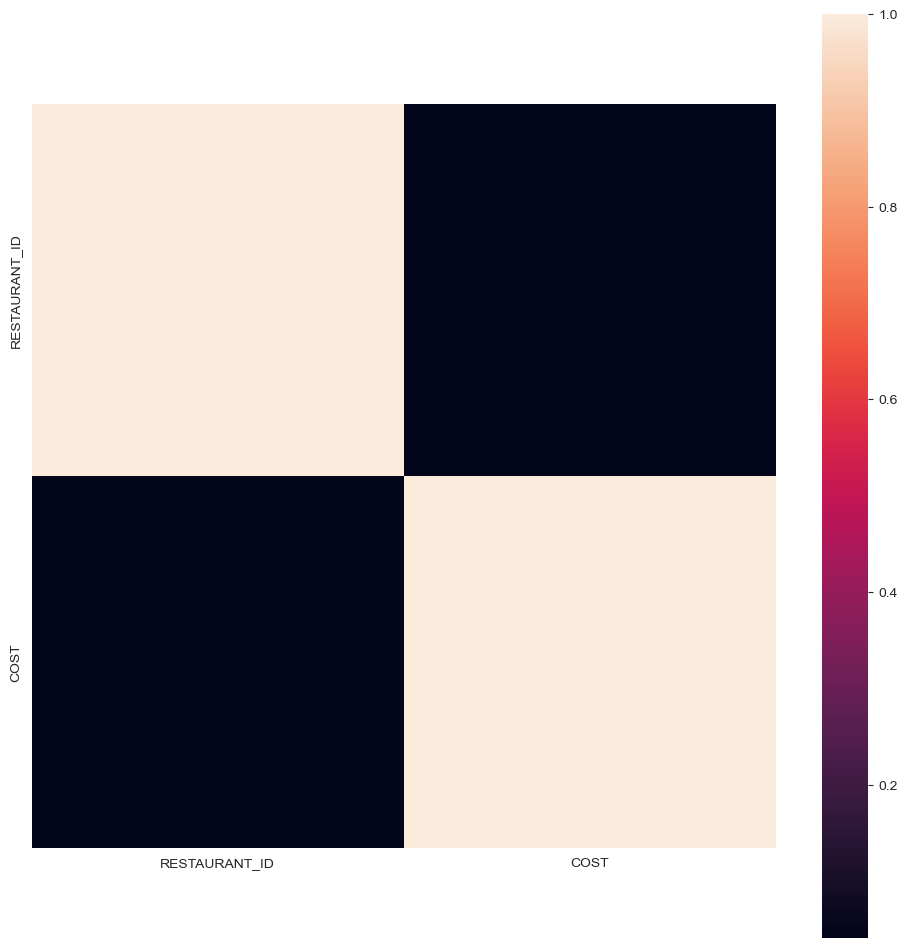

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(data_train.corr(),square=True)
plt.show()

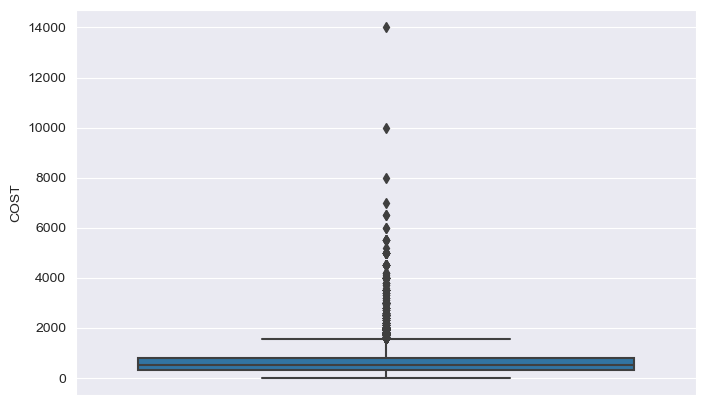

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(y = data_train['COST']) 
plt.show()

In [21]:
df=pd.concat([data_train,data_test])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          16921 non-null  object 
 1   RESTAURANT_ID  16921 non-null  int64  
 2   CUISINES       16921 non-null  object 
 3   TIME           16921 non-null  object 
 4   CITY           16774 non-null  object 
 5   LOCALITY       16793 non-null  object 
 6   RATING         16917 non-null  object 
 7   VOTES          15315 non-null  object 
 8   COST           12690 non-null  float64
 9   source         16921 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.4+ MB


In [23]:
#investing the entire dataset first
df.duplicated().sum()

26

In [24]:
df=df.drop_duplicates()

In [25]:
df.isna().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1602
COST             4230
source              0
dtype: int64

In [26]:
df_train = df.copy()

<AxesSubplot:>

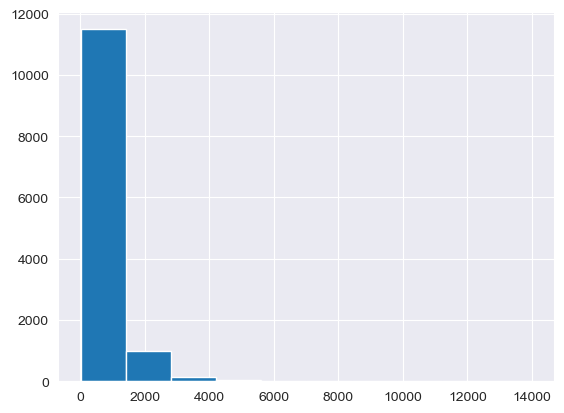

In [27]:
df_train["COST"].hist()

In [28]:
df_train.head(5)

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,data_train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,data_train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,data_train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,data_train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,data_train


<AxesSubplot:>

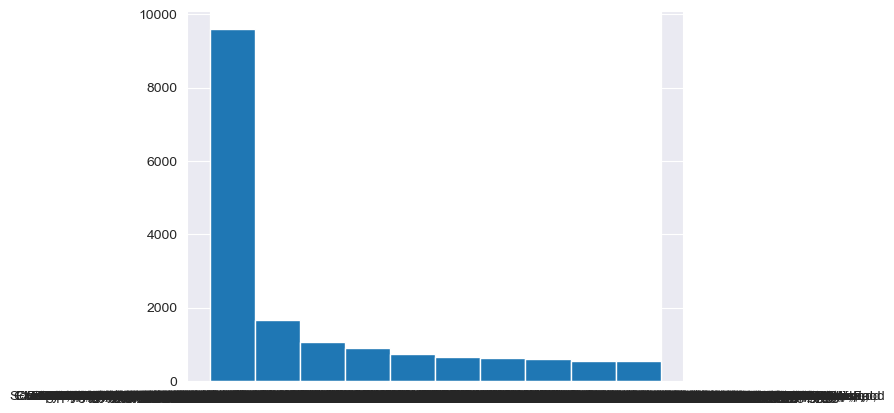

In [29]:
df_train["CUISINES"].hist()

<AxesSubplot:>

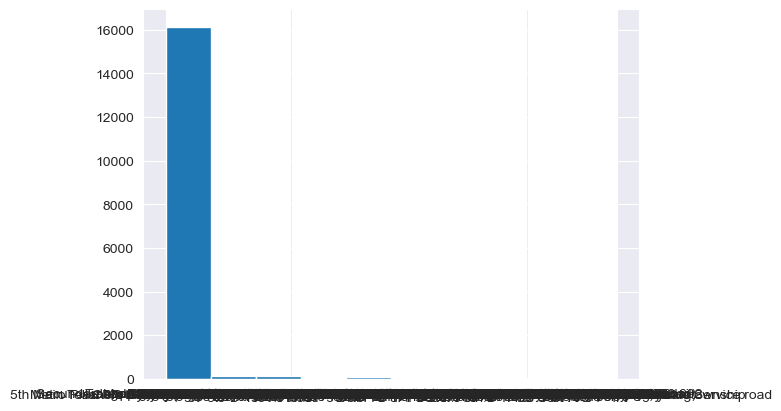

In [30]:
df_train["CITY"].hist()

<AxesSubplot:xlabel='CITY', ylabel='count'>

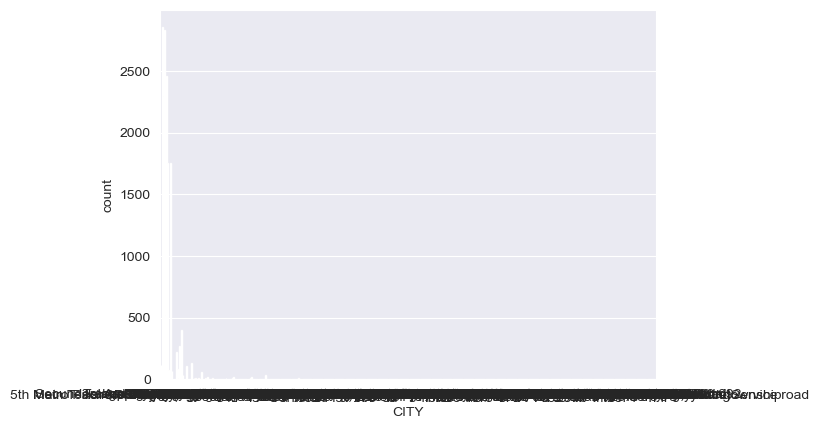

In [31]:
sns.countplot(data=df_train, x="CITY", palette="flare")

<AxesSubplot:xlabel='COST', ylabel='count'>

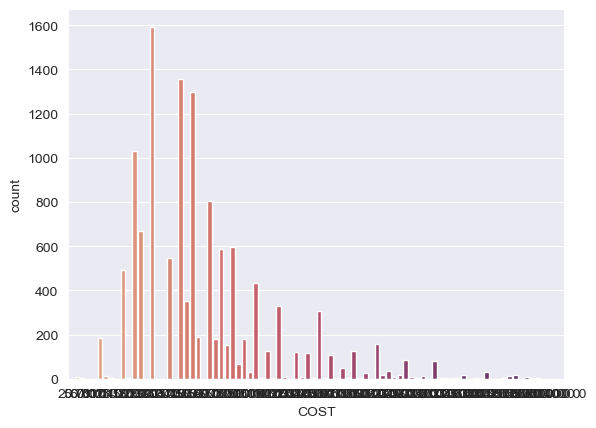

In [32]:
sns.countplot(data=df_train, x="COST", palette="flare")

<AxesSubplot:xlabel='CUISINES', ylabel='count'>

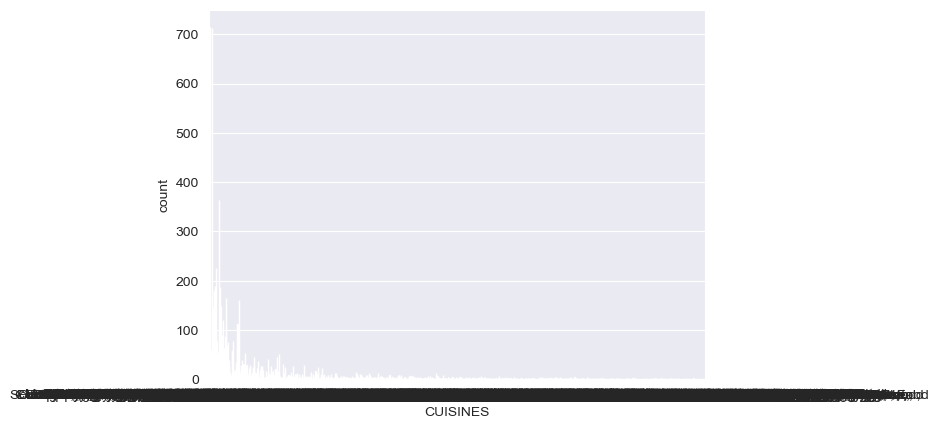

In [33]:
sns.countplot(data=df_train, x="CUISINES", palette="flare")

<AxesSubplot:xlabel='RATING', ylabel='count'>

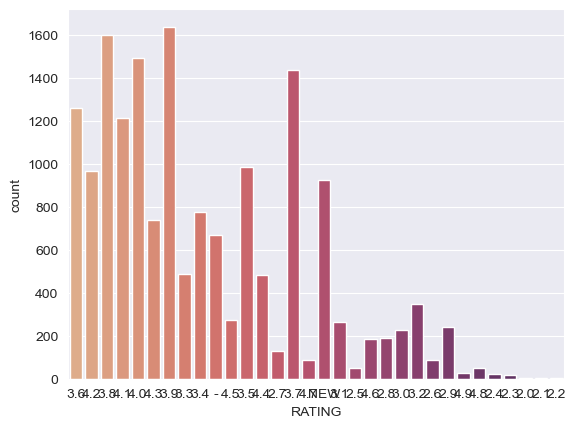

In [34]:
sns.countplot(data=df_train, x="RATING", palette="flare")

In [35]:
# data exploration for city
# city has 147 null values
# combining city and locality
df['Location']=df['CITY']+' '+df['LOCALITY']
df.drop(columns=['CITY' , 'LOCALITY'])

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,COST,source,Location
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",3.6,49 votes,1200.0,data_train,Thane Dombivali East
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),4.2,30 votes,1500.0,data_train,Chennai Ramapuram
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",3.8,221 votes,800.0,data_train,Chennai Saligramam
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),4.1,24 votes,800.0,data_train,Mumbai Bandra West
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),3.8,165 votes,300.0,data_train,Mumbai Lower Parel
...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),3.9,287 votes,NaN,data_test,New Delhi Punjabi Bagh
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),4.3,469 votes,NaN,data_test,Bangalore HSR Layout
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),3.7,53 votes,NaN,data_test,Faridabad Sector 86
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",-,NaN,NaN,data_test,Kochi Kochi


In [36]:
df.dropna(subset=['Location'],inplace=True)

In [37]:
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source,Location
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,data_train,Thane Dombivali East
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,data_train,Chennai Ramapuram
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,data_train,Chennai Saligramam
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,data_train,Mumbai Bandra West
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,data_train,Mumbai Lower Parel
...,...,...,...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,NaN,data_test,New Delhi Punjabi Bagh
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NaN,data_test,Bangalore HSR Layout
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,NaN,data_test,Faridabad Sector 86
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,NaN,data_test,Kochi Kochi


In [38]:
from fuzzywuzzy import process
names_array=[]
def match_names(wrong_names,correct_names):
    for row in wrong_names:
        x = process.extractOne(row, correct_names)
        if x[1]<60:
            names_array.append('Others')
        else:
            names_array.append(x[0])
    return names_array
#wrong country names dataset

correct_names=['Bangalore', 'Thane',
'Hyderabad', 'Andheri',
'Delhi', 'Kerala',
'Chennai', 'Bandra',
'Mumbai', 'Telangana',
'Kochi',
'Noida',
'Gurgaon', 'Ernakulam',
'Faridabad','Ghaziabad',
'Secunderabad' ]
name_match=match_names(df.Location, correct_names)

print(len(names_array))
df['Location']=names_array

16747


In [39]:
cuisines_list=[]
for row in df['CUISINES']:
    cuisines_list.append(list(row.split(',')))

df['CUISINES']=cuisines_list

In [40]:
df['CUISINES'].isna().sum()

0

In [41]:
df_cuisines=df['CUISINES'].apply(lambda x: pd.Series(1,x))

In [42]:
title_list=[]
for row in df['TITLE']:
    title_list.append(list(row.split('.')))
df['TITLE'] = title_list

In [43]:
df_title=df['TITLE'].apply(lambda x: pd.Series(1,x))
df_title.head()

,CASUAL DINING,"CASUAL DINING,BAR",QUICK BITES,DESSERT PARLOR,CAFÉ,MICROBREWERY,"QUICK BITES,BEVERAGE SHOP","CASUAL DINING,IRANI CAFE","BAKERY,QUICK BITES",None,...,"FOOD TRUCK,DESSERT PARLOR","IRANI CAFE,BAKERY","BAKERY,CASUAL DINING","PUB,FINE DINING","CAFÉ,FOOD COURT","FINE DINING,MICROBREWERY","CLUB,FINE DINING","QUICK BITES,MEAT SHOP","CLUB,CASUAL DINING",BHOJANALYA
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


MODELING

In [44]:
#cleaning time - pending
df[df['RATING'].isna()]

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source,Location
204,[BAKERY],15062,[Bakery],Not Available,Kochi,Marine Drive,NaN,NaN,200.0,data_train,Kochi
421,[CAFÉ],14127,"[Cafe, Fast Food]",Not Available,Hyderabad,Banjara Hills,NaN,NaN,350.0,data_train,Hyderabad
2035,[QUICK BITES],2776,"[Kerala, Arabian]",Not Available,Kochi,Kakkanad,NaN,NaN,NaN,data_test,Kochi
2758,[None],11301,"[Chinese, North Indian, South Indian]",Not Available,Kochi,Tripunithura,NaN,NaN,NaN,data_test,Kochi


In [45]:
df["RATING"] = df.groupby("CITY").RATING.transform(lambda x: x.fillna(x.mode()[0]))

In [46]:
df['RATING'] = df['RATING'].str.extract('(\d+)').astype(float)

In [47]:
df['VOTES'].isna().sum()

1579

In [48]:
df.VOTES.fillna('0', inplace=True)
df['VOTES'] = df['VOTES'].str.extract('(\d+)').astype(float)

In [50]:
df.drop(columns='CITY',inplace=True)
df.drop(columns='LOCALITY', inplace=True)
df.drop(columns='CUISINES',inplace=True)

In [51]:
df_City=pd.get_dummies(df['Location'])
df.drop(columns='Location', inplace=True)
df_City.head()

,Andheri,Bandra,Bangalore,Chennai,Delhi,Ernakulam,Faridabad,Ghaziabad,Gurgaon,Hyderabad,Kerala,Kochi,Mumbai,Noida,Others,Secunderabad,Telangana,Thane
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [52]:
df=pd.concat([df,df_City, df_cuisines, df_title], axis=1)

In [53]:
df.drop(columns='TITLE', inplace=True)

In [54]:
df_column_category=df.select_dtypes(exclude=np.number).columns
df_column_category

Index(['TIME', 'source'], dtype='object')

In [55]:
df.drop(columns='TIME', inplace=True)

In [56]:
df.fillna(0, inplace=True)

In [57]:
final_train=df[df.source=="data_train"]
final_test=df[df.source=="data_test"]

In [58]:
final_train.shape

(12552, 375)

In [59]:
final_train.drop(columns=["source"],inplace=True)

In [60]:
final_test.drop(columns=["source",'COST'],inplace=True)

In [61]:
x_train = final_train.drop(columns=["COST",'RESTAURANT_ID'])

In [62]:
y_train=final_train["COST"]

In [63]:
x_test=final_test.drop(columns=["RESTAURANT_ID"])

In [64]:
x_train.fillna(0,inplace=True)
x_train.isna().sum()

RATING                      0
VOTES                       0
Andheri                     0
Bandra                      0
Bangalore                   0
                           ..
FINE DINING,MICROBREWERY    0
CLUB,FINE DINING            0
QUICK BITES,MEAT SHOP       0
CLUB,CASUAL DINING          0
BHOJANALYA                  0
Length: 372, dtype: int64

In [65]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
train_data_predictions=model.predict(x_train)

In [66]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [67]:
#print model report:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
print("\nModel Report")
print ("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train.values,train_data_predictions)))

#predict on testing data:
x_test.fillna(0, inplace=True)
final_test["res_linear"] = model.predict(x_test)


Model Report
RMSE : 322.8


In [68]:
print('r2 train', r2_score(y_train,train_data_predictions))

r2 train 0.7365263658701747


LINEAR SUBMISSION

In [69]:
Linear_sumbission = final_test[["RESTAURANT_ID", "res_linear"]]

In [70]:
Linear_sumbission.head(20)

,RESTAURANT_ID,res_linear
0,4085,9.165403e+02
1,12680,3.393789e+02
2,1411,8.200125e+02
3,204,3.716599e+02
4,13453,1.968871e+02
5,4518,-1.362917e+09
6,1643,6.099869e+02
7,5109,6.343229e+02
8,5606,4.139734e+02
9,14319,6.620659e+02


THANK YOU